In [152]:
%pip install pandas numpy matplotlib scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, math, random, time

Note: you may need to restart the kernel to use updated packages.


### Provide sensor data recording to run the processing/analysis on

In [153]:
SENSOR_DATA = 'recordings/walking3.csv'
ALGORITHM_DATA = SENSOR_DATA.replace('recordings/', 'analysis/').replace('.csv', '_algo.csv')
ANGLES_DATA = SENSOR_DATA.replace('recordings/', 'analysis/').replace('.csv', '_angles.csv')

### Cut off debug data from flashing if there's any left

In [154]:
HEADERS = "time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z"
lines = []
cutting = False
with open(SENSOR_DATA, 'r') as file:
    found_start = False
    for (i, line) in enumerate(file.readlines()):
        if not found_start and HEADERS in line:
            if i == 0:
                break
            found_start = True
            cutting = True
        if found_start:
            lines.append(line)
if cutting:
    with open(SENSOR_DATA, 'w') as file:
        file.writelines(lines[:-1])

### Run the sensor processing code

In [155]:
result = os.system(f'cargo run --release -- {SENSOR_DATA}')
if result != 0:
    raise Exception('Failed to compile sensor data')

    Finished `release` profile [optimized] target(s) in 0.01s
     Running `target/release/test-processing recordings/walking3.csv`


### Load sensor data

In [156]:
sensors = pd.read_csv(SENSOR_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
now = time.time()
sensors['t'] = pd.to_datetime((sensors['time'] / 1_000_000_000.0) + now, unit='s')
sensors.set_index(sensors['t'], inplace=True)
sensors.drop(columns=['t'], inplace=True)
sensors

,time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z
t,,,,,,,
2024-11-18 12:53:38.753091812,327149566000,-0.000133,-0.000933,0.000533,-0.532710,-9.538500,0.502782
2024-11-18 12:53:38.759775877,327156250000,-0.000266,-0.001599,0.000533,-0.532710,-9.542090,0.500388
2024-11-18 12:53:38.768282890,327164757000,0.000000,-0.001066,0.000533,-0.532710,-9.552865,0.499191
2024-11-18 12:53:38.775620937,327172095000,0.000133,-0.000533,0.000400,-0.532710,-9.563639,0.501585
2024-11-18 12:53:38.784025908,327180500000,0.000000,-0.000533,0.000133,-0.529119,-9.570822,0.500388
...,...,...,...,...,...,...,...
2024-11-18 12:53:59.250135899,347646610000,0.000266,-0.000266,0.000133,-0.569820,-9.566033,0.088585
2024-11-18 12:53:59.258377790,347654852000,-0.000533,0.000400,0.000133,-0.569820,-9.560047,0.095768
2024-11-18 12:53:59.266723871,347663198000,-0.000799,0.000266,0.000000,-0.575805,-9.548077,0.089783


### Load algorithm debug data

In [157]:
algo = pd.read_csv(ALGORITHM_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
algo['t'] = pd.to_datetime((algo['time'] / 1_000_000_000.0) + now, unit='s')
algo.set_index(algo['t'], inplace=True)
algo.drop(columns=['t'], inplace=True)
algo.head()

,time,orientation.w,orientation.x,orientation.y,orientation.z,velocity.x,velocity.y,velocity.z,position.x,position.y,...,world_acc.y,world_acc.z,gyro_orientation.w,gyro_orientation.x,gyro_orientation.y,gyro_orientation.z,accel_orientation.w,accel_orientation.x,accel_orientation.y,accel_orientation.z
t,,,,,,,,,,,,,,,,,,,,,
2024-11-18 12:53:38.753077507,327149551616,0.707107,-0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-11-18 12:53:38.759762049,327156236288,0.708031,-0.706180,0.001007,0.000963,-0.003383,0.003178,-0.001750,-0.000023,0.000021,...,0.475449,-0.261836,0.707106,-0.707107,-0.000003,0.000005,0.725104,-0.688076,0.020197,0.019166
2024-11-18 12:53:38.768281937,327164755968,0.708903,-0.705300,0.001964,0.001877,-0.007140,0.006699,-0.003693,-0.000083,0.000078,...,0.450566,-0.248614,0.708031,-0.706180,0.001006,0.000968,0.725042,-0.688143,0.020173,0.019146
2024-11-18 12:53:38.775621891,327172096000,0.709734,-0.704459,0.002873,0.002742,-0.009778,0.009188,-0.005053,-0.000155,0.000146,...,0.430301,-0.235607,0.708904,-0.705300,0.001964,0.001879,0.725108,-0.688075,0.020152,0.019122
2024-11-18 12:53:38.784010410,327180484608,0.710518,-0.703660,0.003729,0.003555,-0.012411,0.011688,-0.006448,-0.000259,0.000244,...,0.407640,-0.226484,0.709734,-0.704459,0.002872,0.002743,0.725056,-0.688138,0.020000,0.018981


### Preview raw sensor data

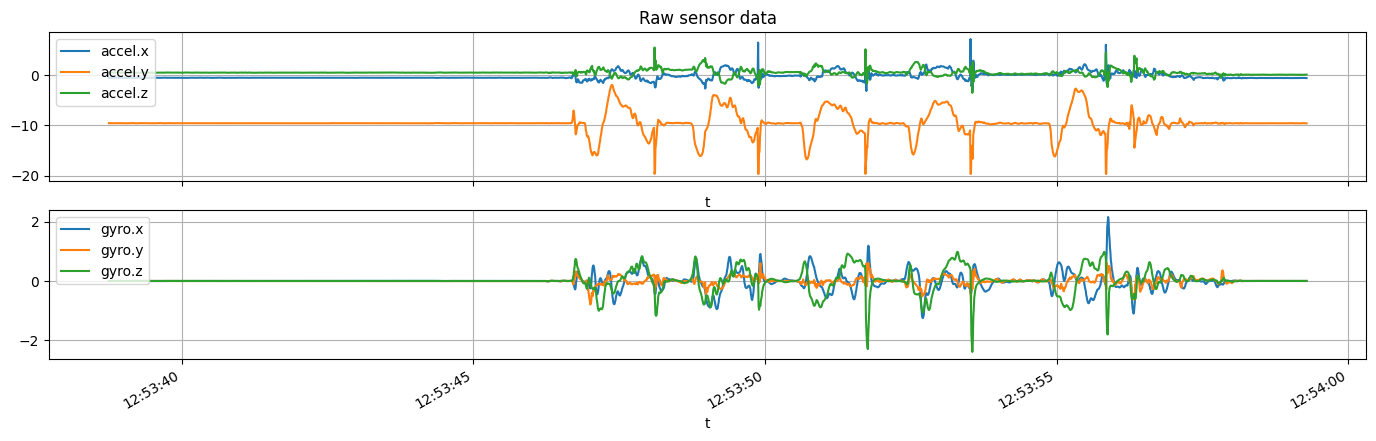

In [158]:
fig, (ax1, ax2) = plt.subplots(2, 1)

sensors['accel.x'].plot(ax=ax1)
sensors['accel.y'].plot(ax=ax1)
sensors['accel.z'].plot(ax=ax1)
ax1.xaxis.set_ticklabels([])
ax1.legend(loc='upper left')
ax1.grid()

sensors['gyro.x'].plot(ax=ax2)
sensors['gyro.y'].plot(ax=ax2)
sensors['gyro.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()

ax1.set_title('Raw sensor data')
fig.set_figwidth(17)

### Gravity vector length

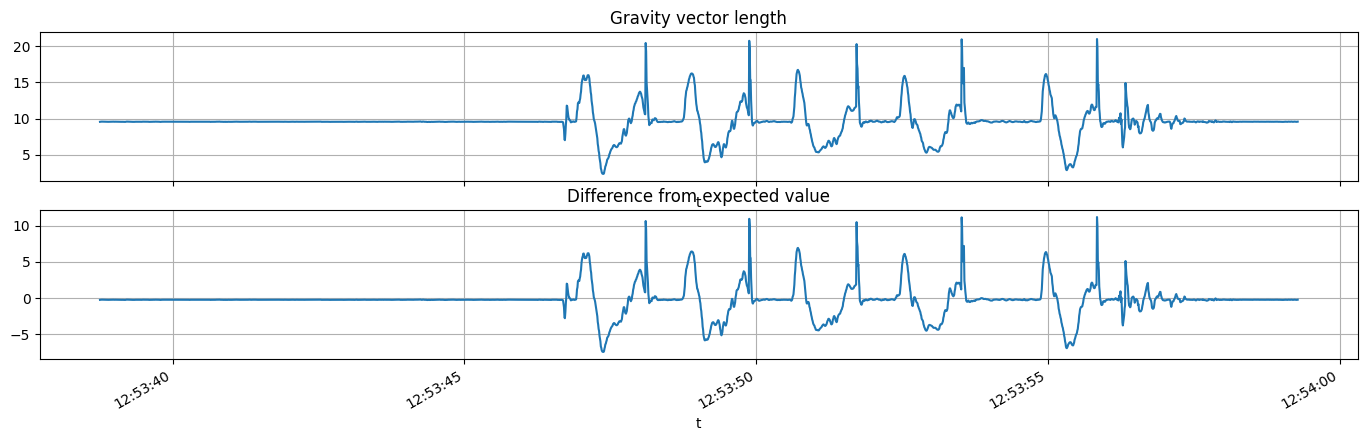

In [159]:
fig, (ax1, ax2) = plt.subplots(2, 1)

sensors['accel._length'] = np.sqrt(sensors['accel.x'] ** 2 + sensors['accel.y'] ** 2 + sensors['accel.z'] ** 2)
sensors['accel._length'].plot(ax=ax1)
ax1.grid()
ax1.set_title('Gravity vector length')
ax1.xaxis.set_ticklabels([])

sensors['gravity_delta'] = sensors['accel._length'] - 9.80665
sensors['gravity_delta'].plot(ax=ax2)
ax2.grid()
ax2.set_title('Difference from expected value')

fig.set_figwidth(17)

### Preview computed position, velocity, acceleration

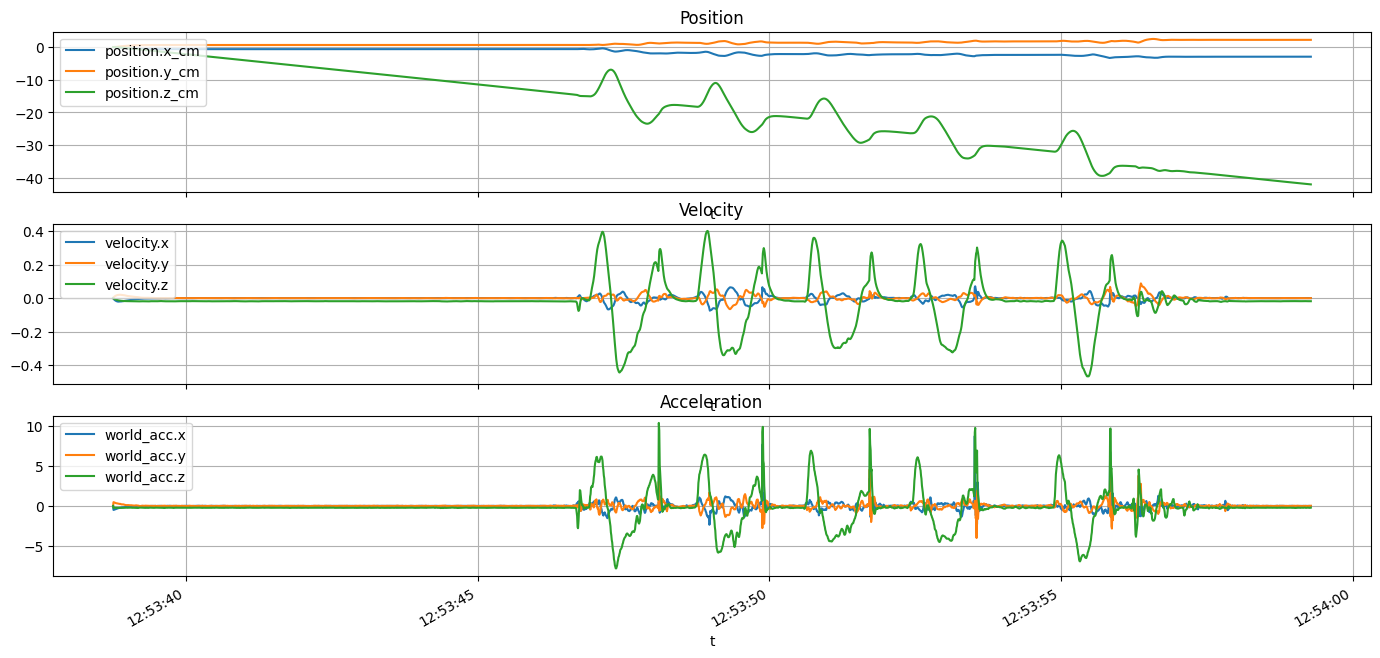

In [160]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

algo['position.x_cm'] = algo['position.x'] * 100
algo['position.y_cm'] = algo['position.y'] * 100
algo['position.z_cm'] = algo['position.z'] * 100

algo['position.x_cm'].plot(ax=ax1)
algo['position.y_cm'].plot(ax=ax1)
algo['position.z_cm'].plot(ax=ax1)
ax1.legend(loc='upper left')
ax1.grid()
ax1.set_title('Position')
ax1.xaxis.set_ticklabels([])

algo['velocity.x'].plot(ax=ax2)
algo['velocity.y'].plot(ax=ax2)
algo['velocity.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()
ax2.set_title('Velocity')
ax2.xaxis.set_ticklabels([])

algo['world_acc.x'].plot(ax=ax3)
algo['world_acc.y'].plot(ax=ax3)
algo['world_acc.z'].plot(ax=ax3)
ax3.legend(loc='upper left')
ax3.grid()
ax3.set_title('Acceleration')

fig.set_figwidth(17)
fig.set_figheight(8)

### Load Euler angles

In [161]:
angles = pd.read_csv(ANGLES_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
angles['t'] = pd.to_datetime((angles['time'] / 1_000_000_000.0) + now, unit='s')
angles.set_index(angles['t'], inplace=True)
angles.drop(columns=['t'], inplace=True)
angles.head()

,time,fusion.yaw,fusion.pitch,fusion.roll,gyro.yaw,gyro.pitch,gyro.roll,accel.yaw,accel.pitch,accel.roll
t,,,,,,,,,,
2024-11-18 12:53:38.753077507,327149551616,0.000000,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
2024-11-18 12:53:38.759762049,327156236288,-0.003388,0.159678,-89.850080,0.000612,0.000204,-90.000114,0.000000e+00,3.190981,-86.99814
2024-11-18 12:53:38.768281937,327164755968,-0.006289,0.311259,-89.708084,-0.002867,0.159937,-89.850090,1.068871e-07,3.187420,-87.00869
2024-11-18 12:53:38.775621891,327172096000,-0.008988,0.455005,-89.572600,-0.006064,0.311426,-89.708030,-1.068867e-07,3.183804,-86.99775
2024-11-18 12:53:38.784010410,327180484608,-0.011171,0.590285,-89.444400,-0.008731,0.455067,-89.572600,-2.137685e-07,3.160044,-87.00715


### Compare orientations

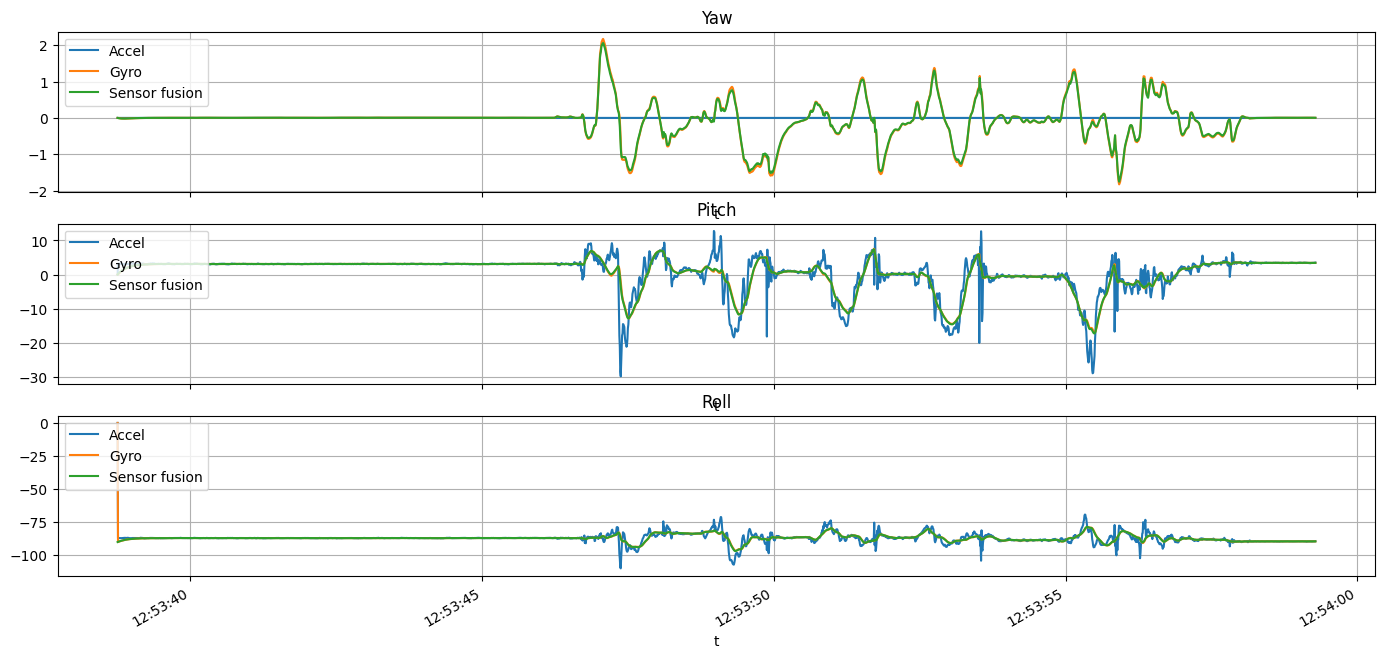

In [162]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

angles['accel.yaw'].plot(ax=ax1, label='Accel')
angles['gyro.yaw'].plot(ax=ax1, label='Gyro')
angles['fusion.yaw'].plot(ax=ax1, label='Sensor fusion')
ax1.legend(loc='upper left')
ax1.grid()
ax1.set_title('Yaw')
ax1.xaxis.set_ticklabels([])

angles['accel.pitch'].plot(ax=ax2, label='Accel')
angles['gyro.pitch'].plot(ax=ax2, label='Gyro')
angles['fusion.pitch'].plot(ax=ax2, label='Sensor fusion')
ax2.legend(loc='upper left')
ax2.grid()
ax2.set_title('Pitch')
ax2.xaxis.set_ticklabels([])

angles['accel.roll'].plot(ax=ax3, label='Accel')
angles['gyro.roll'].plot(ax=ax3, label='Gyro')
angles['fusion.roll'].plot(ax=ax3, label='Sensor fusion')
ax3.legend(loc='upper left')
ax3.grid()
ax3.set_title('Roll')

fig.set_figwidth(17)
fig.set_figheight(8)

### Packets per second

<Axes: xlabel='t'>

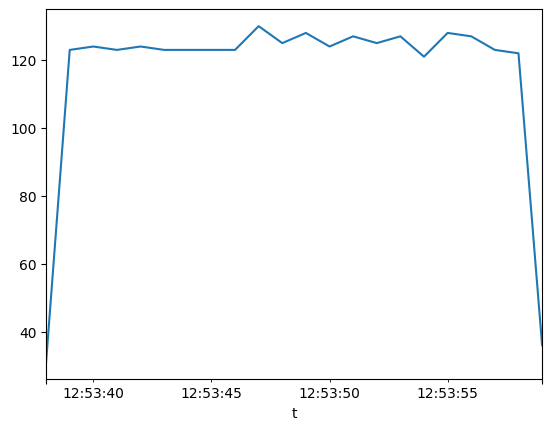

In [163]:
packets = sensors.resample('1s').count()
packets.drop(columns=['gyro.x','gyro.y'], inplace=True)
packets.rename(columns={'time': 'packets/s'}, inplace=True)
packets['packets/s'].plot()